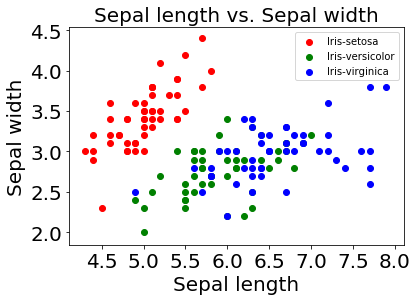

In [18]:

from sklearn.datasets import load_iris
data = load_iris().data

labels = load_iris().target
labels = labels.reshape(150,1)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_fin = np.concatenate([data,labels],axis=-1)

import pandas as pd
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data_fin,columns=names)

dataset['species'].replace(0,'Iris-setosa',inplace=True)
dataset['species'].replace(1,'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace = True)

#print(dataset.head(5))

plt.scatter(data_fin[:50,0],data_fin[:50,1],c='r',label='Iris-setosa')
plt.scatter(data_fin[50:100,0],data_fin[50:100,1],c='g',label='Iris-versicolor')
plt.scatter(data_fin[100:150,0],data_fin[100:150,1],c='b',label='Iris-virginica')
plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend()
plt.show()

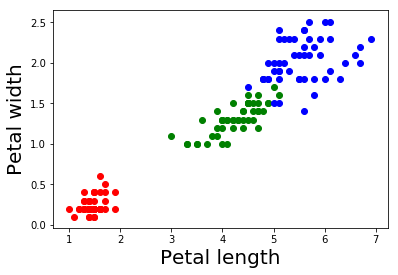

In [19]:
plt.scatter(data_fin[:50,2],data_fin[:50,3],c='r',label='Iris-setosa')
plt.scatter(data_fin[50:100,2],data_fin[50:100,3],c='g',label='Iris-versicolor')
plt.scatter(data_fin[100:150,2],data_fin[100:150,3],c='b',label='Iris-virginica')
plt.ylabel('Petal width',fontsize=20)
plt.xlabel('Petal length',fontsize=20)
plt.show()

In [20]:
dataset.iloc[:,2:].corr()

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


In [21]:
dataset.iloc[:50,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [12]:
dataset.iloc[50:100,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [13]:
dataset.iloc[100:150,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


C:\Users\Darshan\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


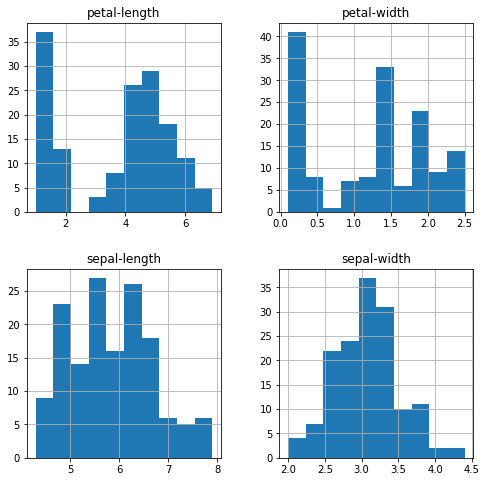

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

In [17]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
from sklearn.model_selection import train_test_split

In [27]:
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:4],dataset.iloc[:,4],test_size=0.2,random_state=0)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
neighbours = np.arange(1,9)
test_accuracy = np.zeros(len(neighbours))
train_accuracy = np.zeros(len(neighbours))

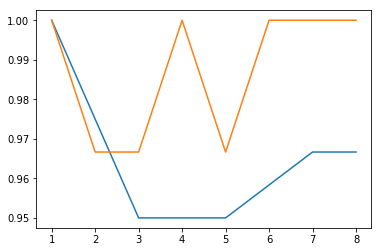

In [33]:
for i,k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data,train_label)
    train_accuracy[i] = knn.score(train_data,train_label)
    test_accuracy[i] = knn.score(test_data,test_label)
    
plt.plot(neighbours,train_accuracy)
plt.plot(neighbours,test_accuracy)

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_data,train_label)
train_accuracy = knn.score(train_data,train_label)
test_accuracy = knn.score(test_data,test_label)
    

In [36]:
test_accuracy

1.0

In [37]:
prediction = knn.predict(test_data)

In [38]:
from sklearn.metrics import confusion_matrix

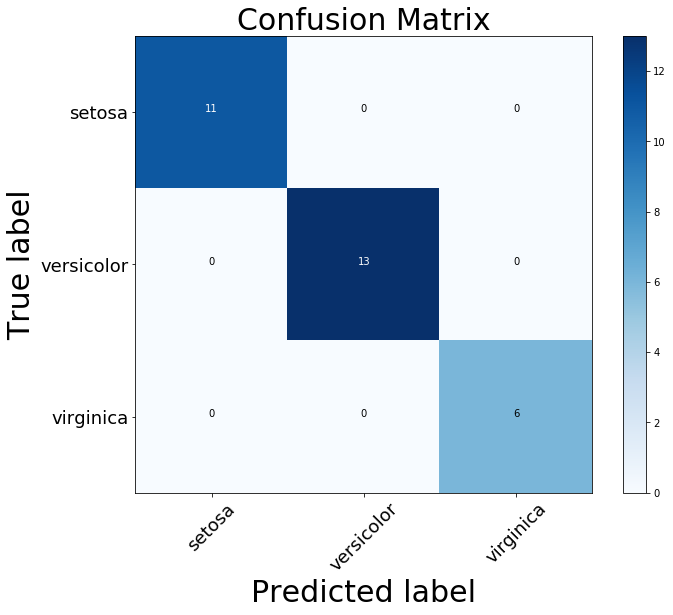

In [41]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_label,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

